DBSCAN stands for Density-Based Spatial Clustering for Applications with Noise. This is an unsupervised clustering algorithm which is used to find high-density base samples to extend the clusters.

DBSCAN Clustering in Machine Learning
The DBSCAN Clustering algorithm is based on the concept of core samples, non-core samples, and outliers:

1. Core Samples: The samples present in the high-density area have minimum sample points with the eps radius.

2. Non-core samples: The samples close to core samples but are not core samples but are very near to the core samples. The no-core samples lie within the eps radius of the core samples but they don’t have minimum samples points.

3. Outliers: The samples that are not part of the core samples and the non-core samples and are far away from all the samples.


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("/content/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

So we have some null values in the Maximum Payments column. I will fill these values with the average values and here I will also remove the customer id column as it is useless:


In [4]:
data = data.drop('CUST_ID', axis=1)
data.fillna(data.mean(), inplace=True)

In [5]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now let’s scale and normalize the dataset:

In [6]:
# scaling and normalizing the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
x_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [8]:
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)
x_normal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146893,0.103128,-0.066344,-0.071050,-0.026403,-0.092916,0.252770,-0.135091,0.234852,-0.134432,-0.094764,-0.069751,-0.191180,-0.096784,-6.964046e-02,0.235672,-0.820660
8946,-0.151521,0.105735,-0.067173,-0.072846,-0.025067,-0.095266,0.259162,-0.138507,0.240791,-0.137832,-0.097161,-0.071515,-0.196014,-0.102738,-1.095171e-16,-0.107259,-0.841413
8947,-0.156974,-0.039324,-0.085222,-0.075675,-0.062521,-0.098965,0.181181,-0.143885,0.161230,-0.143183,-0.100933,-0.082821,-0.203625,-0.120978,-7.112317e-02,0.069795,-0.874082
8948,-0.154320,-0.038411,-0.097240,-0.073918,-0.094139,-0.093057,-0.253016,-0.140545,-0.189902,0.032623,-0.037897,-0.122556,-0.227357,-0.120224,-7.184155e-02,0.068175,-0.853792


Now let's implement the Principal Component Analysis (PCA) algorithm in machine learning to reduce the dimensionality of the data for visualization:

In [9]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)

x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -0.489825 -0.679678
1 -0.518791  0.545012
2  0.330885  0.268978
3 -0.482374 -0.092110
4 -0.563289 -0.481915


Now let’s implement the DBSCAN algorithm and have a look at the data and the clusters after implementing it:

In [10]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)

labels = dbscan.labels_

data['cluster'] = dbscan.labels_

print(data.tail())

         BALANCE  BALANCE_FREQUENCY  ...  TENURE  cluster
8945   28.493517           1.000000  ...       6        0
8946   19.183215           1.000000  ...       6        0
8947   23.398673           0.833333  ...       6        0
8948   13.457564           0.833333  ...       6        0
8949  372.708075           0.666667  ...       6        0

[5 rows x 18 columns]


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


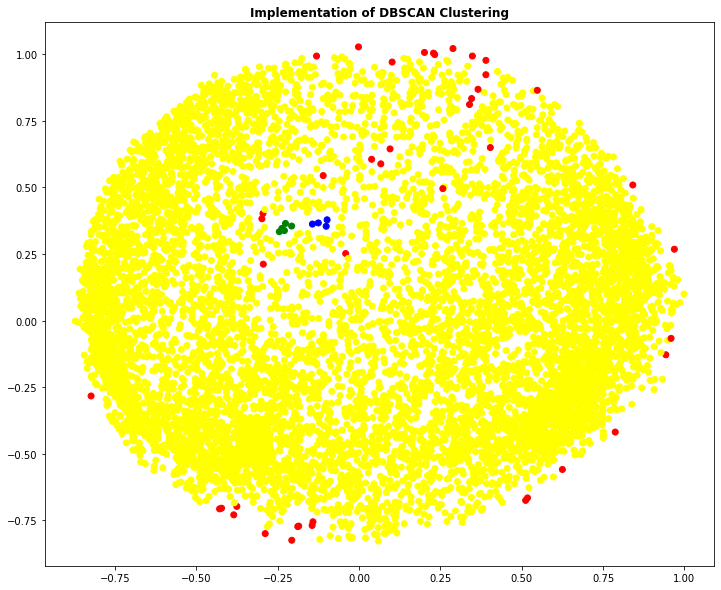

In [11]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]

plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

Conclusion:

DBSCAN clustering algorithm is a very simple and powerful clustering algorithm in machine learning. It can identify any cluster of any shape. 

It is robust to outliers and has only two hyperparameters. 

It may be difficult for it to capture the clusters properly if the cluster density increases significantly.